# Programming Assignment 4: Data Wrangling and Data Visualization

Villarmil, Arc Joseph C.

2ECE-D

In [11]:
#imports relevant libraries
import pandas as pd #for data frames
import matplotlib.pyplot as plt #for data visualization (graphs)
import seaborn as sns #for data visualization (advanced)

**ECE Board Exam Problem:**<br>
Analyze the ECE Board Exam 2 dataset (board2.xlsx) using data wrangling and data visualization techniques.<br>

In [13]:
#Part 1: Data Frames
print("Here's the board exam scores for ECE:\n")
dfExam = pd.read_excel('board2.xlsx') #loads the ECE board exam scores as dfExam
print(dfExam,'\n') #shows the whole data first
print("\n...That's a lot of data, let's condense it down for specific aspects.\n")

#scores of GEAS and names of those who scored higher than 70 in Electronics where their track is Instrumentation and hometown is Luzon
print("\nScores of GEAS and Electronics greater than 70 from Instrumentation track test takers from Luzon:") #states the conditions for part a
Instru = dfExam.loc[ #uses .loc function to find the conditions and equates the dataframe to Instru
    (dfExam['Electronics']>70)& #checks if the scores under Electronics is greater than 70
    (dfExam['Hometown']=='Luzon')& #and checks if the test takers' hometown is  Luzon
    (dfExam['Track'] == 'Instrumentation'), #then checks if their tracks are under Instrumentation
    ['Name','GEAS','Electronics']] #then these are the columns to be located in the dataframe
print(Instru) #prints out Instru

#scores in Electronics, names, and tracks of those who scored higher or equal to the average of 55 where their hometown is Mindanao and their gender is Female
print("\nScores of Electronics and their tracks with Averages of 55 and above from Female test takers from Mindanao:") #states the conditions for part b
dfExam['Average'] = dfExam[['Math','Electronics','GEAS','Communication']].mean(axis=1) #first adds a new column 'Average' by getting the mean of the following columns by axis 1 (horizontal)
Mindy = dfExam.loc[ #uses .loc function to find the conditions and equates the dataframe to Mindy
    (dfExam['Average']>=55)& #checks if the Average is 55 or higher
    (dfExam['Hometown'] == 'Mindanao')& #and checks if the test takers' hometown is Mindanao
    (dfExam['Gender'] == 'Female'), #then checks if the test takers' gender is female
    ['Name','Track','Electronics','Average']] #then these are the columns to be located in the dataframe
print(Mindy) #prints out Mindy

Here's the board exam scores for ECE:

   Name  Gender             Track  Hometown  Math  Electronics  GEAS  \
0    S1    Male   Instrumentation     Luzon    58           89    75   
1    S2  Female     Communication  Mindanao    52           75    90   
2    S3  Female   Instrumentation  Mindanao    83           74    77   
3    S4    Male   Instrumentation   Visayas    65           58    91   
4    S5    Male     Communication     Luzon    59           86    43   
5    S6  Female  Microelectronics   Visayas    88           45    86   
6    S7  Female   Instrumentation     Luzon    66           60    60   
7    S8    Male   Instrumentation     Luzon    49           81    64   
8    S9    Male   Instrumentation     Luzon    50           36    63   
9   S10    Male  Microelectronics  Mindanao    80           84    61   
10  S11  Female     Communication   Visayas    48           56    48   
11  S12    Male     Communication   Visayas    89           67    84   
12  S13  Female  Microele

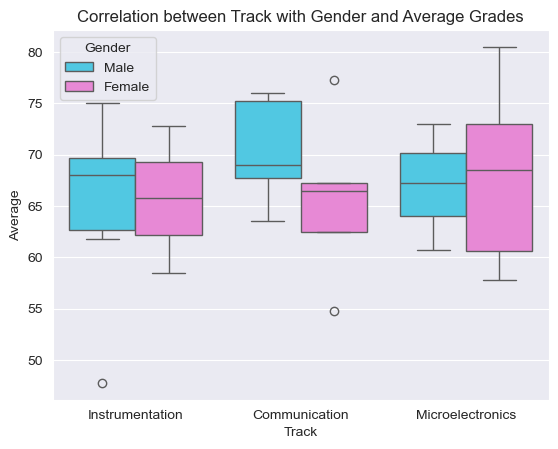


Initial analysis: Males tend to perform better on average on most tracks except for Microelectronics, where it's more concentrated in comparison to females



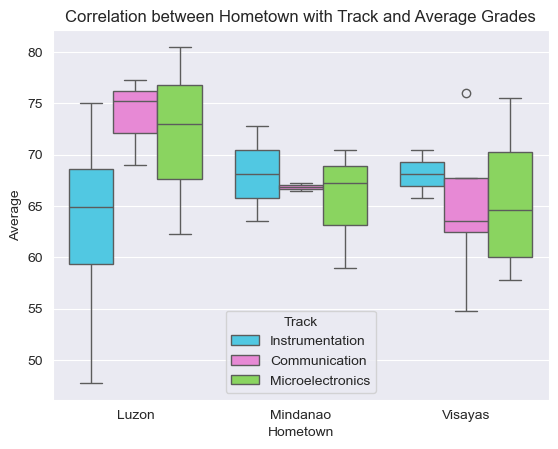


Initial analysis: Test takers from Luzon seem to get higher scores, except for Instrumentation, but its data is more varied compared to the other regions



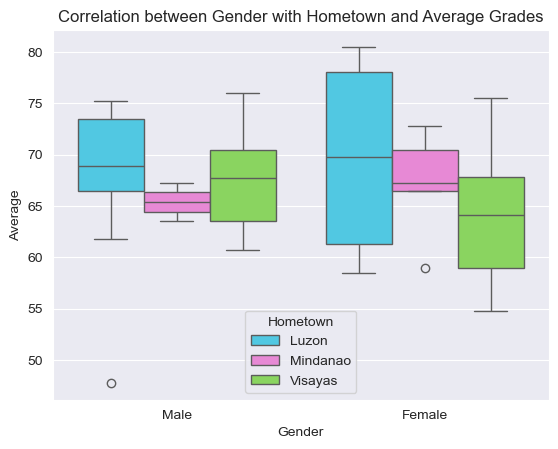


Initial analysis: Female test takers seem to obtain higher scores than Male test takers, except those from Visayas, but their scores are more varied compared to Males


Final analysis: Male test takers from all regions and tracks seem to make more consistent scores compared to the higher, but more varied, scores from Females
Luzon generally provides higher but more varied scores due to their access to higher quality facilities for education, while the more consistent results from Visayas and Mindanao proves their dedication for the course
Despite the inequal trends among regions and consistent trends among genders, the Instrumentation track has the lowest scores on average, this is probably due to the more academical nature of the other courses, while Insturmentation has a more hands-on approach.


In [15]:
#Part 2: Data Visualization

#Sets style of the plots
sns.set_style("darkgrid")
palette = ["#39d8fa","#f67adf","#85e74d"]
sns.set_palette(palette)

#first checks the correlation of Track and Gender with the Average Grades
sns.boxplot(x ='Track', y ='Average', hue ='Gender', data = dfExam) #This creates a boxplot using Seaborn with Track and Gender regarding the Average Grades
plt.title('Correlation between Track with Gender and Average Grades') #Using plotlibrary to create a title for the boxplot
plt.show() #To show the boxplot 
print('\nInitial analysis: Males tend to perform better on average on most tracks except for Microelectronics, where it\'s more concentrated in comparison to females\n')

#next checks the correlation of Hometown and Track with the Average Grades
sns.boxplot(x='Hometown', y='Average', hue='Track', data=dfExam) #This creates a boxplot using Seaborn with Hometown and Track regarding the Average Grades
plt.title('Correlation between Hometown with Track and Average Grades') #displays title 
plt.show() #To show the boxplot 
print('\nInitial analysis: Test takers from Luzon seem to get higher scores, except for Instrumentation, but its data is more varied compared to the other regions\n')

#last checks the correlation of Gender and Hometown with the Average Grades
sns.boxplot(x='Gender', y='Average', hue='Hometown', data=dfExam) #This creates a boxplot using Seaborn with Gender and Hometown regarding the Average Grades
plt.title('Correlation between Gender with Hometown and Average Grades') #displays title 
plt.show() #To show the boxplot 
print('\nInitial analysis: Female test takers seem to obtain higher scores than Male test takers, except those from Visayas, but their scores are more varied compared to Males\n')

#Prints analysis
print('\nFinal analysis: Male test takers from all regions and tracks seem to make more consistent scores compared to the higher, but more varied, scores from Females')
print('Luzon generally provides higher but more varied scores due to their access to higher quality facilities for education, while the more consistent results from Visayas and Mindanao proves their dedication for the course')
print('Despite the inequal trends among regions and consistent trends among genders, the Instrumentation track has the lowest scores on average, this is probably due to the more academical nature of the other courses, while Insturmentation has a more hands-on approach.')